# IPAN - ImageJ Processing Assistant Notebook

## 04 - Nuclei Count
**Use the IPAN module to run the image processing and count the number of Nuclei for multiple images stained wih DABI**

***
### Import Libraries and packages that will be called from the notebook

In [1]:
import scyjava
from IPython.display import Image 
from os.path import expanduser
import numpy as np
import os

In [2]:
#Import libraries for dataframe management and visualization - settings
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans",
    "font.serif": ["Palatino"]})

***
### Import the IPAN python module 

In [3]:
#We can specify the maximum size in bytes of the memory allocation pools g = gigabytes
scyjava.config.add_options('-Xmx2g') # <--- Set 2G memory.

In [4]:
#The import of the IPAN module generates different Warnings in output but they don't affect its functionality
import IPAN

---------------------------------------------------
Importing packages:

os loaded
tiffle loaded
io loaded
matplotlib loaded
numpy loaded
pathlib loaded


---------------------------------------------------
Importing ImageJ:



log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


23:09:10.669 [SciJava-2fca5d38-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

***
### CASE 1
#### Run MACRO on ONE image and display the results
MACRO: NUCLEI COUNT AND DESCRIPTION 
***

Build the function that return a dataframe for each analysed image. <br> In this case we set the function so that it takes in input the EXPERIMENT FOLDER. <br> All the function will be used in process mode to avoid that the results will be printed to screen. 

#### 1 - Select the Experiment folder
Inser the path of the folder that contains the image you want to analyse. <br> A new directory named "Results" will be created in that folder to store all the results.

Paste here the relative path of the experiment folder. Paste the IPAN-Project folder in your home directory

In [5]:
EXPERIMENT_FOLDER = "/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1" 

In [6]:
IPAN.FolderTree(EXPERIMENT_FOLDER)

NucleiCount_Case1/
├── .DS_Store
└── sample1.tif


Get the list of the file that will be analysed. For Case1 there is only ONE file

In [7]:
file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]

filename = file_list[0]
file_path = EXPERIMENT_FOLDER + "/" + filename

print("The list of files under analysis:\n", file_path)

The list of files under analysis:
 /Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1/sample1.tif


Define the function Count_nuclei as a combination of the functions imported from the IPAN module

In [8]:
def Count_nuclei(IN):
    #Open the image
    IPAN.Open(path_in = IN, process= True)
    
    #Process the image
    IPAN.Filter(process= True)
    IPAN.SubtractBackground(process= True)
    IPAN.Threshold(process= True)
 
    #Analyse the particles and save results
    data = IPAN.Count(process= True)
    IPAN.CloseAll()
    
    return data

Run the function on the pre-selected filepath. <br> The *%%capture* magic command avoid to show the STDoutput of the function. However, the Analyse Particles functions embedded in the IPAN.Count() function will print the results to screen.

In [9]:
%%capture
results = Count_nuclei(file_path)

 	Label	Area	Circ.	AR	Round	Solidity
1	sample1_thresholded.tif	202.378	0.846	1.569	0.637	0.936
2	sample1_thresholded.tif	196.040	0.883	1.288	0.776	0.936
3	sample1_thresholded.tif	176.605	0.824	1.652	0.605	0.934
4	sample1_thresholded.tif	161.818	0.855	1.313	0.761	0.927
5	sample1_thresholded.tif	265.753	0.800	1.845	0.542	0.933
6	sample1_thresholded.tif	174.915	0.891	1.186	0.843	0.936
7	sample1_thresholded.tif	151.678	0.804	1.720	0.581	0.925
8	sample1_thresholded.tif	238.713	0.827	1.631	0.613	0.939
9	sample1_thresholded.tif	156.325	0.858	1.494	0.669	0.933
10	sample1_thresholded.tif	199.843	0.818	1.120	0.893	0.911
11	sample1_thresholded.tif	79.853	0.525	1.785	0.560	0.831
12	sample1_thresholded.tif	164.775	0.885	1.124	0.890	0.944
13	sample1_thresholded.tif	127.595	0.783	1.341	0.746	0.911
14	sample1_thresholded.tif	220.123	0.817	1.624	0.616	0.936
15	sample1_thresholded.tif	177.028	0.804	1.241	0.806	0.914
16	sample1_thresholded.tif	201.955	0.738	1.680	0.595	0.920
17	sample1_thresholded.tif	37

196	sample1_thresholded.tif	221.390	0.911	1.188	0.841	0.951
197	sample1_thresholded.tif	255.613	0.874	1.463	0.684	0.950
198	sample1_thresholded.tif	214.630	0.857	1.585	0.631	0.944
199	sample1_thresholded.tif	204.913	0.867	1.303	0.767	0.943
200	sample1_thresholded.tif	137.735	0.781	1.382	0.724	0.907
201	sample1_thresholded.tif	361.238	0.871	1.312	0.762	0.955
202	sample1_thresholded.tif	234.488	0.850	1.291	0.774	0.935
203	sample1_thresholded.tif	206.603	0.864	1.074	0.931	0.939
204	sample1_thresholded.tif	247.585	0.809	1.517	0.659	0.935
205	sample1_thresholded.tif	187.168	0.900	1.235	0.810	0.943
206	sample1_thresholded.tif	199.420	0.911	1.104	0.906	0.944
207	sample1_thresholded.tif	347.718	0.887	1.235	0.809	0.955
208	sample1_thresholded.tif	193.928	0.849	1.652	0.605	0.944
209	sample1_thresholded.tif	207.025	0.883	1.164	0.859	0.940
210	sample1_thresholded.tif	210.828	0.804	1.639	0.610	0.925
211	sample1_thresholded.tif	214.208	0.860	1.410	0.709	0.941
212	sample1_thresholded.tif	226.460	0.79

368	sample1_thresholded.tif	408.558	0.862	1.321	0.757	0.954
369	sample1_thresholded.tif	385.743	0.879	1.211	0.826	0.950
370	sample1_thresholded.tif	203.223	0.816	1.513	0.661	0.938
371	sample1_thresholded.tif	217.165	0.896	1.130	0.885	0.940
372	sample1_thresholded.tif	223.925	0.743	1.999	0.500	0.924
373	sample1_thresholded.tif	439.400	0.691	1.519	0.658	0.864
374	sample1_thresholded.tif	190.970	0.821	1.488	0.672	0.920
375	sample1_thresholded.tif	205.335	0.852	1.534	0.652	0.940
376	sample1_thresholded.tif	363.773	0.881	1.302	0.768	0.958
377	sample1_thresholded.tif	224.348	0.759	1.825	0.548	0.930
378	sample1_thresholded.tif	230.263	0.862	1.423	0.703	0.945
379	sample1_thresholded.tif	214.630	0.797	1.669	0.599	0.924
380	sample1_thresholded.tif	365.463	0.865	1.326	0.754	0.951
381	sample1_thresholded.tif	198.998	0.896	1.173	0.853	0.939
382	sample1_thresholded.tif	221.813	0.846	1.369	0.730	0.930
383	sample1_thresholded.tif	177.028	0.777	1.708	0.585	0.926
384	sample1_thresholded.tif	218.433	0.86

640	sample1_thresholded.tif	199.843	0.882	1.457	0.687	0.945
641	sample1_thresholded.tif	227.728	0.815	1.384	0.723	0.931
642	sample1_thresholded.tif	191.815	0.906	1.375	0.727	0.957
643	sample1_thresholded.tif	432.218	0.762	1.685	0.594	0.938
644	sample1_thresholded.tif	208.715	0.890	1.389	0.720	0.948
645	sample1_thresholded.tif	194.350	0.899	1.061	0.943	0.945
646	sample1_thresholded.tif	391.235	0.632	2.196	0.455	0.846
647	sample1_thresholded.tif	210.405	0.910	1.181	0.847	0.945
648	sample1_thresholded.tif	182.943	0.906	1.080	0.926	0.942
649	sample1_thresholded.tif	234.065	0.897	1.284	0.779	0.948
650	sample1_thresholded.tif	214.630	0.848	1.592	0.628	0.953
651	sample1_thresholded.tif	214.630	0.857	1.309	0.764	0.946
652	sample1_thresholded.tif	172.803	0.846	1.019	0.981	0.947
653	sample1_thresholded.tif	204.490	0.835	1.269	0.788	0.935
654	sample1_thresholded.tif	390.390	0.786	1.685	0.593	0.912
655	sample1_thresholded.tif	213.363	0.847	1.369	0.731	0.927
656	sample1_thresholded.tif	198.998	0.87

The *results* variable represent the path where the .csv has been saved

In [10]:
print(results)

/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case1/Results/sample1_data.csv


### From the Data to the Plot

#### Open the result file
Firstly, create the folder that will contain all the plots of this exeriment. Then, by using pandas, the datagrame will be imported, cleaned and finally described. 

In [11]:
#Create folder to save images
resultdir = results.rsplit('/', 1)[0]
plotdir = resultdir+"/"+"Plots"
try:
    os.mkdir(plotdir)
    print("Output directory created")
except FileExistsError:
        print("Output directory already exist.")

Output directory created


In [12]:
#Import, clean and summaries dataframe
Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0)
Data = Data.drop("Label", axis = 1)
Data.rename(columns={'Circ.': 'Circularity'}, inplace=True)
Data_summary = Data.describe()

print("\n", Data_summary)
print("\nTotal number of nuclei:\t", Data.shape[0])
 
#We can easily perform basic statiscs on the data


               Area  Circularity          AR       Round    Solidity
count   844.000000   844.000000  844.000000  844.000000  844.000000
mean    231.757507     0.834250    1.425737    0.720781    0.932608
std      88.823499     0.064299    0.249362    0.114399    0.021595
min       8.450000     0.433000    1.012000    0.333000    0.730000
25%     193.083000     0.805750    1.248000    0.638000    0.927000
50%     212.940000     0.848000    1.389000    0.720000    0.937000
75%     235.333000     0.878250    1.566000    0.801000    0.944000
max    1140.751000     0.994000    3.005000    0.988000    0.968000

Total number of nuclei:	 844


Starting from the dataframe we can produce different type of plots. Here for example I produce a bar plot that shows the area of the nuclei. The dotted line represents the average nuclei area.

#### Nuclei Area

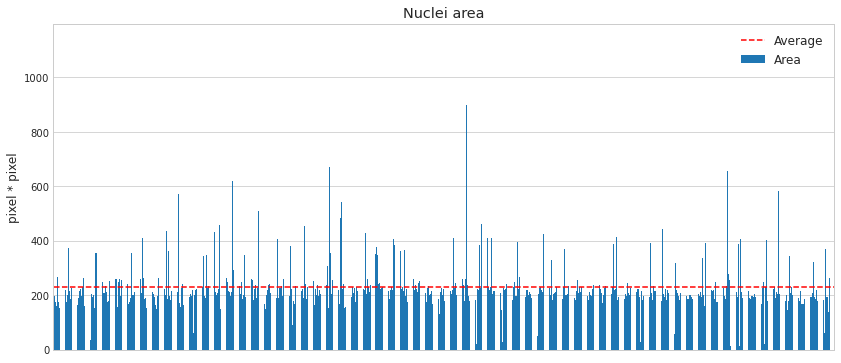

In [13]:
#Set Figure size and the coloum we wabt to plot
ax = Data.plot.bar(y='Area', width=0.6, title="Nuclei area", figsize=(14,6))
plt.hlines(y=Data_summary.at["mean","Area"], 
           xmin = 0, xmax = Data.shape[0],
           color='red',linestyle='--', label = "Average")
ax.xaxis.set_visible(False)
plt.ylabel("pixel * pixel")
ax.legend()
plt.savefig(f"{plotdir}/Nuclei Area.tiff", bbox_inches = "tight")
plt.show()

Here we summarize the neclei feature by producting a series of BOXPLOT, one for each of the feature selected in the *Set Measurements()* in the Count function 
#### Nuclei features

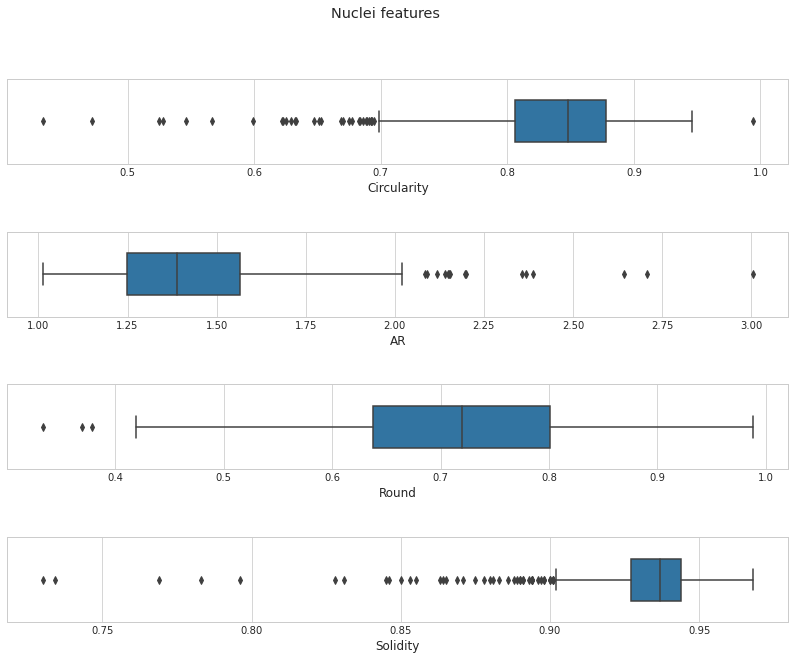

In [14]:
Data = Data.drop("Area", axis = 1)                                #Already plotted

fig, axs = plt.subplots(len(Data.columns), figsize=(14,10))       #This code works for multiple measurements
fig.suptitle('Nuclei features')
plt.subplots_adjust(hspace = 0.8)
for n in range(len(Data.columns)):
    sns.boxplot(x= Data[Data.columns[n]], data=Data, width=.5, ax=axs[n])
        #plt.figure(figsize=(14,1.5))
        #sns.boxplot(data=Data_box, x=column)
plt.savefig(f"{plotdir}/Nuclei features.", bbox_inches = "tight")

***
### CASE 2
#### Run MACRO on MULTIPLE images 
MACRO: NUCLEI PROCESS, COUNTER
***

#### Select the experimental folder

In the following situation we want to analyse multiple samples and show as output the descriptives of the analysis. Mean, Standard Deviation, etc. <br> Get the list of the file (for Case1 there is only one file) that will be analysed

In [17]:
EXPERIMENT_FOLDER = "/Users/nicolascristini/IPAN-Project/IPAN/CASES/NucleiCount_Case2"

In [18]:
#PRINT PATH TREE
IPAN.FolderTree(EXPERIMENT_FOLDER)

NucleiCount_Case2/
├── .DS_Store
├── sample1.tif
├── sample2.tif
└── sample3.tif


#### 2 - Run the function  in a for cycle
We can run the function inside the cycle and change at each run the name of the file in input of the function.

In [19]:
file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]
file_list

['sample1.tif', 'sample2.tif', 'sample3.tif']

In [20]:
%%capture

file_list = [f for f in os.listdir(EXPERIMENT_FOLDER) if f.endswith(".tif" or ".TIF")]
dict_results = {}

for n in range(len(file_list)):
    #Call the function on the single file_path
    file_path = EXPERIMENT_FOLDER + "/" + file_list[n]
    results = Count_nuclei(file_path)
    
    #Open the data.csv with panda and clean the data_frame
    Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0)
    Data = Data.drop("Label", axis = 1)
    Data.rename(columns={'Circ.': 'Circularity'}, inplace=True)
    
    #Save the data frame in a dictionary where all the data are collected
    dict_results[file_list[n]] = Data
    
    print(file_list[n], "is processed!\n") 

 	Label	Area	Circ.	AR	Round	Solidity
1	sample1_thresholded.tif	202.378	0.846	1.569	0.637	0.936
2	sample1_thresholded.tif	196.040	0.883	1.288	0.776	0.936
3	sample1_thresholded.tif	176.605	0.824	1.652	0.605	0.934
4	sample1_thresholded.tif	161.818	0.855	1.313	0.761	0.927
5	sample1_thresholded.tif	265.753	0.800	1.845	0.542	0.933
6	sample1_thresholded.tif	174.915	0.891	1.186	0.843	0.936
7	sample1_thresholded.tif	151.678	0.804	1.720	0.581	0.925
8	sample1_thresholded.tif	238.713	0.827	1.631	0.613	0.939
9	sample1_thresholded.tif	156.325	0.858	1.494	0.669	0.933
10	sample1_thresholded.tif	199.843	0.818	1.120	0.893	0.911
11	sample1_thresholded.tif	79.853	0.525	1.785	0.560	0.831
12	sample1_thresholded.tif	164.775	0.885	1.124	0.890	0.944
13	sample1_thresholded.tif	127.595	0.783	1.341	0.746	0.911
14	sample1_thresholded.tif	220.123	0.817	1.624	0.616	0.936
15	sample1_thresholded.tif	177.028	0.804	1.241	0.806	0.914
16	sample1_thresholded.tif	201.955	0.738	1.680	0.595	0.920
17	sample1_thresholded.tif	37

209	sample1_thresholded.tif	207.025	0.883	1.164	0.859	0.940
210	sample1_thresholded.tif	210.828	0.804	1.639	0.610	0.925
211	sample1_thresholded.tif	214.208	0.860	1.410	0.709	0.941
212	sample1_thresholded.tif	226.460	0.799	1.708	0.585	0.942
213	sample1_thresholded.tif	256.458	0.749	1.347	0.742	0.920
214	sample1_thresholded.tif	203.223	0.915	1.191	0.840	0.944
215	sample1_thresholded.tif	261.105	0.817	1.635	0.612	0.945
216	sample1_thresholded.tif	256.880	0.892	1.193	0.838	0.946
217	sample1_thresholded.tif	181.675	0.881	1.091	0.917	0.934
218	sample1_thresholded.tif	224.348	0.865	1.267	0.789	0.943
219	sample1_thresholded.tif	236.600	0.819	1.749	0.572	0.945
220	sample1_thresholded.tif	190.970	0.918	1.250	0.800	0.949
221	sample1_thresholded.tif	227.728	0.795	1.360	0.735	0.930
222	sample1_thresholded.tif	509.535	0.699	1.965	0.509	0.904
223	sample1_thresholded.tif	14.788	0.546	1.315	0.761	0.769
224	sample1_thresholded.tif	189.703	0.904	1.228	0.814	0.940
225	sample1_thresholded.tif	383.208	0.824

456	sample1_thresholded.tif	440.668	0.857	1.252	0.799	0.951
457	sample1_thresholded.tif	181.675	0.905	1.114	0.898	0.940
458	sample1_thresholded.tif	19.858	0.528	1.255	0.797	0.734
459	sample1_thresholded.tif	223.080	0.839	1.409	0.710	0.940
460	sample1_thresholded.tif	219.278	0.850	1.490	0.671	0.941
461	sample1_thresholded.tif	383.208	0.844	1.544	0.648	0.950
462	sample1_thresholded.tif	225.193	0.843	1.548	0.646	0.941
463	sample1_thresholded.tif	463.060	0.881	1.227	0.815	0.961
464	sample1_thresholded.tif	220.545	0.857	1.444	0.692	0.939
465	sample1_thresholded.tif	223.925	0.816	1.486	0.673	0.936
466	sample1_thresholded.tif	226.883	0.881	1.298	0.770	0.949
467	sample1_thresholded.tif	207.025	0.838	1.417	0.706	0.929
468	sample1_thresholded.tif	202.800	0.877	1.195	0.837	0.933
469	sample1_thresholded.tif	269.555	0.885	1.200	0.833	0.947
470	sample1_thresholded.tif	412.360	0.847	1.296	0.772	0.950
471	sample1_thresholded.tif	230.685	0.863	1.197	0.836	0.936
472	sample1_thresholded.tif	221.390	0.844

743	sample1_thresholded.tif	406.023	0.567	3.005	0.333	0.865
744	sample1_thresholded.tif	212.940	0.818	1.256	0.796	0.926
745	sample1_thresholded.tif	191.815	0.802	1.311	0.763	0.913
746	sample1_thresholded.tif	194.773	0.909	1.214	0.824	0.953
747	sample1_thresholded.tif	216.320	0.700	1.903	0.525	0.902
748	sample1_thresholded.tif	358.280	0.807	1.639	0.610	0.954
749	sample1_thresholded.tif	190.125	0.864	1.320	0.757	0.933
750	sample1_thresholded.tif	166.043	0.838	1.244	0.804	0.926
751	sample1_thresholded.tif	370.955	0.837	1.357	0.737	0.944
752	sample1_thresholded.tif	216.320	0.793	1.577	0.634	0.945
753	sample1_thresholded.tif	191.815	0.861	1.338	0.747	0.927
754	sample1_thresholded.tif	185.055	0.805	1.619	0.618	0.932
755	sample1_thresholded.tif	196.885	0.859	1.187	0.842	0.934
756	sample1_thresholded.tif	196.885	0.786	1.860	0.538	0.916
757	sample1_thresholded.tif	194.773	0.909	1.092	0.916	0.944
758	sample1_thresholded.tif	205.335	0.831	1.357	0.737	0.923
759	sample1_thresholded.tif	192.660	0.84

178	sample2_thresholded.tif	167.733	0.825	1.374	0.728	0.919
179	sample2_thresholded.tif	28.308	0.791	1.155	0.866	0.876
180	sample2_thresholded.tif	143.650	0.798	1.730	0.578	0.914
181	sample2_thresholded.tif	190.548	0.800	1.449	0.690	0.926
182	sample2_thresholded.tif	11.830	0.634	1.805	0.554	0.737
183	sample2_thresholded.tif	133.933	0.842	1.585	0.631	0.927
184	sample2_thresholded.tif	290.680	0.829	1.259	0.795	0.932
185	sample2_thresholded.tif	186.323	0.771	1.843	0.543	0.937
186	sample2_thresholded.tif	288.990	0.577	1.108	0.903	0.809
187	sample2_thresholded.tif	77.740	0.605	1.942	0.515	0.854
188	sample2_thresholded.tif	150.833	0.855	1.465	0.683	0.928
189	sample2_thresholded.tif	187.590	0.850	1.604	0.623	0.943
190	sample2_thresholded.tif	176.605	0.913	1.231	0.812	0.941
191	sample2_thresholded.tif	190.125	0.795	1.321	0.757	0.917
192	sample2_thresholded.tif	161.818	0.842	1.295	0.772	0.924
193	sample2_thresholded.tif	166.465	0.830	1.680	0.595	0.933
194	sample2_thresholded.tif	136.045	0.719	1

362	sample2_thresholded.tif	185.478	0.846	1.217	0.822	0.949
363	sample2_thresholded.tif	180.830	0.704	1.220	0.819	0.883
364	sample2_thresholded.tif	343.915	0.800	1.575	0.635	0.931
365	sample2_thresholded.tif	339.690	0.799	1.617	0.619	0.914
366	sample2_thresholded.tif	354.900	0.865	1.243	0.804	0.953
367	sample2_thresholded.tif	202.378	0.856	1.507	0.664	0.950
368	sample2_thresholded.tif	190.548	0.829	1.109	0.902	0.928
369	sample2_thresholded.tif	243.360	0.527	2.156	0.464	0.819
370	sample2_thresholded.tif	197.730	0.762	1.333	0.750	0.897
371	sample2_thresholded.tif	585.586	0.704	1.698	0.589	0.900
372	sample2_thresholded.tif	181.675	0.818	1.650	0.606	0.937
373	sample2_thresholded.tif	192.660	0.795	1.507	0.663	0.927
374	sample2_thresholded.tif	195.618	0.837	1.498	0.667	0.947
375	sample2_thresholded.tif	177.028	0.942	1.059	0.945	0.963
376	sample2_thresholded.tif	203.223	0.853	1.450	0.690	0.958
377	sample2_thresholded.tif	27.885	0.610	1.359	0.736	0.825
378	sample2_thresholded.tif	370.955	0.633

524	sample2_thresholded.tif	194.773	0.860	1.355	0.738	0.937
525	sample2_thresholded.tif	217.588	0.843	1.474	0.678	0.937
526	sample2_thresholded.tif	187.168	0.868	1.417	0.706	0.941
527	sample2_thresholded.tif	195.618	0.876	1.287	0.777	0.937
528	sample2_thresholded.tif	98.865	0.735	1.312	0.762	0.900
529	sample2_thresholded.tif	211.673	0.768	1.647	0.607	0.923
530	sample2_thresholded.tif	172.803	0.894	1.156	0.865	0.937
531	sample2_thresholded.tif	212.518	0.745	1.851	0.540	0.908
532	sample2_thresholded.tif	196.040	0.891	1.410	0.709	0.944
533	sample2_thresholded.tif	191.393	0.850	1.606	0.623	0.942
534	sample2_thresholded.tif	182.520	0.849	1.158	0.863	0.947
535	sample2_thresholded.tif	343.070	0.768	1.731	0.578	0.941
536	sample2_thresholded.tif	288.990	0.846	1.190	0.840	0.943
537	sample2_thresholded.tif	147.030	0.795	1.783	0.561	0.935
538	sample2_thresholded.tif	188.013	0.909	1.200	0.833	0.944
539	sample2_thresholded.tif	217.165	0.766	1.941	0.515	0.930
540	sample2_thresholded.tif	235.755	0.794

689	sample2_thresholded.tif	306.735	0.849	1.172	0.853	0.941
690	sample2_thresholded.tif	180.408	0.842	1.495	0.669	0.938
691	sample2_thresholded.tif	164.775	0.771	1.587	0.630	0.903
692	sample2_thresholded.tif	227.728	0.805	1.409	0.710	0.926
693	sample2_thresholded.tif	184.633	0.880	1.242	0.805	0.940
694	sample2_thresholded.tif	260.683	0.831	1.320	0.757	0.931
695	sample2_thresholded.tif	203.645	0.881	1.302	0.768	0.933
696	sample2_thresholded.tif	228.995	0.841	1.396	0.716	0.924
697	sample2_thresholded.tif	178.295	0.875	1.270	0.787	0.935
698	sample2_thresholded.tif	251.810	0.868	1.245	0.803	0.938
699	sample2_thresholded.tif	187.590	0.902	1.363	0.734	0.948
700	sample2_thresholded.tif	431.795	0.785	1.446	0.692	0.940
701	sample2_thresholded.tif	183.365	0.850	1.425	0.702	0.928
702	sample2_thresholded.tif	169.000	0.928	1.130	0.885	0.948
703	sample2_thresholded.tif	198.998	0.842	1.645	0.608	0.948
704	sample2_thresholded.tif	172.803	0.836	1.497	0.668	0.925
705	sample2_thresholded.tif	170.268	0.88

826	sample2_thresholded.tif	224.348	0.855	1.542	0.648	0.940
827	sample2_thresholded.tif	209.560	0.899	1.382	0.724	0.953
828	sample2_thresholded.tif	197.308	0.864	1.529	0.654	0.946
829	sample2_thresholded.tif	189.703	0.850	1.476	0.677	0.929
830	sample2_thresholded.tif	43.940	0.903	1.280	0.781	0.893
831	sample2_thresholded.tif	84.500	0.813	1.593	0.628	0.895
832	sample2_thresholded.tif	203.223	0.820	1.677	0.596	0.946
833	sample2_thresholded.tif	194.350	0.883	1.378	0.726	0.944
834	sample2_thresholded.tif	209.983	0.822	1.426	0.701	0.928
835	sample2_thresholded.tif	254.768	0.778	1.788	0.559	0.938
836	sample2_thresholded.tif	193.083	0.840	1.530	0.654	0.935
837	sample2_thresholded.tif	184.210	0.849	1.549	0.645	0.938
838	sample2_thresholded.tif	223.925	0.860	1.302	0.768	0.931
839	sample2_thresholded.tif	202.378	0.868	1.422	0.703	0.948
840	sample2_thresholded.tif	269.978	0.841	1.357	0.737	0.946
841	sample2_thresholded.tif	225.193	0.854	1.486	0.673	0.930
842	sample2_thresholded.tif	207.448	0.861	

1098	sample2_thresholded.tif	199.843	0.778	1.998	0.500	0.926
1099	sample2_thresholded.tif	215.898	0.891	1.217	0.822	0.947
1100	sample2_thresholded.tif	344.760	0.893	1.299	0.770	0.962
1101	sample2_thresholded.tif	219.278	0.810	1.571	0.636	0.928
1102	sample2_thresholded.tif	239.558	0.847	1.496	0.668	0.938
1103	sample2_thresholded.tif	190.970	0.886	1.432	0.699	0.947
1104	sample2_thresholded.tif	211.250	0.879	1.352	0.739	0.943
1105	sample2_thresholded.tif	179.140	0.853	1.564	0.639	0.942
1106	sample2_thresholded.tif	206.180	0.823	1.593	0.628	0.932
1107	sample2_thresholded.tif	228.573	0.747	1.798	0.556	0.908
1108	sample2_thresholded.tif	180.408	0.844	1.597	0.626	0.933
1109	sample2_thresholded.tif	180.830	0.846	1.292	0.774	0.926
1110	sample2_thresholded.tif	180.830	0.890	1.202	0.832	0.932
1111	sample2_thresholded.tif	211.673	0.856	1.338	0.747	0.939
1112	sample2_thresholded.tif	173.225	0.896	1.097	0.911	0.935
1113	sample2_thresholded.tif	197.308	0.896	1.129	0.885	0.942
1114	sample2_thresholded

 	Label	Area	Circ.	AR	Round	Solidity
1	sample3_thresholded.tif	160.550	0.904	1.359	0.736	0.939
2	sample3_thresholded.tif	125.060	0.575	2.411	0.415	0.862
3	sample3_thresholded.tif	130.130	0.791	1.620	0.617	0.915
4	sample3_thresholded.tif	111.963	0.892	1.417	0.706	0.941
5	sample3_thresholded.tif	146.608	0.831	1.500	0.667	0.925
6	sample3_thresholded.tif	114.075	0.761	1.814	0.551	0.915
7	sample3_thresholded.tif	164.775	0.865	1.080	0.926	0.917
8	sample3_thresholded.tif	156.325	0.847	1.503	0.665	0.931
9	sample3_thresholded.tif	148.298	0.784	1.483	0.674	0.916
10	sample3_thresholded.tif	157.170	0.877	1.356	0.738	0.931
11	sample3_thresholded.tif	70.135	0.806	1.719	0.582	0.905
12	sample3_thresholded.tif	114.498	0.855	1.477	0.677	0.930
13	sample3_thresholded.tif	122.103	0.809	1.542	0.649	0.910
14	sample3_thresholded.tif	165.198	0.749	1.640	0.610	0.910
15	sample3_thresholded.tif	119.145	0.893	1.336	0.748	0.931
16	sample3_thresholded.tif	138.158	0.899	1.213	0.824	0.938
17	sample3_thresholded.tif	16

188	sample3_thresholded.tif	268.710	0.587	2.016	0.496	0.855
189	sample3_thresholded.tif	351.520	0.675	1.796	0.557	0.878
190	sample3_thresholded.tif	201.533	0.853	1.393	0.718	0.922
191	sample3_thresholded.tif	180.830	0.856	1.580	0.633	0.943
192	sample3_thresholded.tif	107.738	0.892	1.342	0.745	0.931
193	sample3_thresholded.tif	163.508	0.827	1.634	0.612	0.914
194	sample3_thresholded.tif	348.985	0.746	1.967	0.508	0.941
195	sample3_thresholded.tif	28.308	1.000	1.022	0.978	0.937
196	sample3_thresholded.tif	425.458	0.828	1.131	0.884	0.938
197	sample3_thresholded.tif	173.648	0.912	1.188	0.841	0.942
198	sample3_thresholded.tif	83.233	0.723	1.960	0.510	0.908
199	sample3_thresholded.tif	141.115	0.881	1.465	0.683	0.941
200	sample3_thresholded.tif	133.933	0.903	1.367	0.732	0.936
201	sample3_thresholded.tif	186.745	0.764	1.549	0.646	0.906
202	sample3_thresholded.tif	142.383	0.767	1.893	0.528	0.902
203	sample3_thresholded.tif	155.058	0.915	1.423	0.703	0.951
204	sample3_thresholded.tif	198.575	0.835	

469	sample3_thresholded.tif	324.058	0.805	1.456	0.687	0.931
470	sample3_thresholded.tif	168.578	0.891	1.487	0.672	0.950
471	sample3_thresholded.tif	185.055	0.805	1.492	0.670	0.940
472	sample3_thresholded.tif	302.088	0.835	1.498	0.668	0.945
473	sample3_thresholded.tif	183.365	0.724	1.987	0.503	0.912
474	sample3_thresholded.tif	143.650	0.850	1.423	0.703	0.915
475	sample3_thresholded.tif	170.268	0.886	1.434	0.698	0.946
476	sample3_thresholded.tif	158.015	0.852	1.325	0.755	0.949
477	sample3_thresholded.tif	185.055	0.777	1.576	0.634	0.926
478	sample3_thresholded.tif	248.008	0.865	1.371	0.729	0.946
479	sample3_thresholded.tif	157.170	0.836	1.113	0.898	0.916
480	sample3_thresholded.tif	146.608	0.800	1.672	0.598	0.920
481	sample3_thresholded.tif	163.085	0.868	1.450	0.689	0.943
482	sample3_thresholded.tif	19.435	0.781	2.010	0.497	0.844
483	sample3_thresholded.tif	162.663	0.806	1.572	0.636	0.923
484	sample3_thresholded.tif	168.155	0.838	1.481	0.675	0.929
485	sample3_thresholded.tif	212.518	0.815

607	sample3_thresholded.tif	83.655	0.732	1.970	0.508	0.882
608	sample3_thresholded.tif	160.973	0.934	1.309	0.764	0.953
609	sample3_thresholded.tif	173.648	0.829	1.398	0.715	0.930
610	sample3_thresholded.tif	193.505	0.777	1.876	0.533	0.933
611	sample3_thresholded.tif	182.520	0.846	1.418	0.705	0.929
612	sample3_thresholded.tif	604.598	0.716	1.520	0.658	0.910
613	sample3_thresholded.tif	179.985	0.835	1.442	0.694	0.923
614	sample3_thresholded.tif	149.143	0.886	1.277	0.783	0.949
615	sample3_thresholded.tif	109.850	0.856	1.159	0.863	0.951
616	sample3_thresholded.tif	285.610	0.870	1.222	0.818	0.947
617	sample3_thresholded.tif	186.323	0.852	1.504	0.665	0.928
618	sample3_thresholded.tif	193.083	0.840	1.349	0.742	0.931
619	sample3_thresholded.tif	165.198	0.813	1.741	0.575	0.931
620	sample3_thresholded.tif	165.198	0.797	1.932	0.518	0.948
621	sample3_thresholded.tif	149.565	0.876	1.506	0.664	0.937
622	sample3_thresholded.tif	289.835	0.818	1.449	0.690	0.936
623	sample3_thresholded.tif	280.540	0.767

793	sample3_thresholded.tif	194.350	0.870	1.349	0.741	0.937
794	sample3_thresholded.tif	275.893	0.782	1.861	0.537	0.934
795	sample3_thresholded.tif	200.688	0.851	1.514	0.660	0.941
796	sample3_thresholded.tif	375.603	0.696	1.786	0.560	0.894
797	sample3_thresholded.tif	186.323	0.777	1.911	0.523	0.934
798	sample3_thresholded.tif	165.198	0.799	1.573	0.636	0.918
799	sample3_thresholded.tif	192.238	0.861	1.575	0.635	0.945
800	sample3_thresholded.tif	195.195	0.821	1.680	0.595	0.933
801	sample3_thresholded.tif	239.980	0.725	1.675	0.597	0.920
802	sample3_thresholded.tif	186.745	0.931	1.048	0.954	0.947
803	sample3_thresholded.tif	166.888	0.781	1.922	0.520	0.913
804	sample3_thresholded.tif	177.873	0.906	1.285	0.778	0.944
805	sample3_thresholded.tif	195.195	0.828	1.427	0.701	0.927
806	sample3_thresholded.tif	140.693	0.728	1.750	0.571	0.896
807	sample3_thresholded.tif	193.083	0.852	1.567	0.638	0.936
808	sample3_thresholded.tif	237.445	0.848	1.443	0.693	0.944
809	sample3_thresholded.tif	168.155	0.83

977	sample3_thresholded.tif	185.478	0.873	1.273	0.786	0.927
978	sample3_thresholded.tif	204.490	0.834	1.431	0.699	0.929
979	sample3_thresholded.tif	165.198	0.922	1.118	0.894	0.943
980	sample3_thresholded.tif	152.100	0.849	1.541	0.649	0.942
981	sample3_thresholded.tif	155.903	0.747	2.060	0.485	0.919
982	sample3_thresholded.tif	170.690	0.840	1.342	0.745	0.916
983	sample3_thresholded.tif	215.898	0.834	1.302	0.768	0.927
984	sample3_thresholded.tif	192.660	0.784	1.734	0.577	0.920
985	sample3_thresholded.tif	536.575	0.677	1.338	0.748	0.876
986	sample3_thresholded.tif	145.340	0.857	1.566	0.639	0.934
987	sample3_thresholded.tif	196.463	0.822	1.215	0.823	0.931
988	sample3_thresholded.tif	137.313	0.887	1.197	0.836	0.926
989	sample3_thresholded.tif	207.870	0.839	1.218	0.821	0.929
990	sample3_thresholded.tif	347.718	0.746	1.594	0.627	0.896
991	sample3_thresholded.tif	190.970	0.862	1.053	0.949	0.922
992	sample3_thresholded.tif	109.428	0.725	1.913	0.523	0.890
993	sample3_thresholded.tif	181.675	0.82

1166	sample3_thresholded.tif	209.983	0.754	2.000	0.500	0.933
1167	sample3_thresholded.tif	190.970	0.865	1.524	0.656	0.948
1168	sample3_thresholded.tif	150.833	0.917	1.365	0.733	0.949
1169	sample3_thresholded.tif	167.310	0.913	1.250	0.800	0.943
1170	sample3_thresholded.tif	154.213	0.847	1.622	0.617	0.941
1171	sample3_thresholded.tif	355.323	0.675	2.137	0.468	0.914
1172	sample3_thresholded.tif	149.565	0.816	1.737	0.576	0.928
1173	sample3_thresholded.tif	85.345	0.726	1.761	0.568	0.867
1174	sample3_thresholded.tif	100.133	0.880	1.386	0.721	0.915
1175	sample3_thresholded.tif	155.058	0.756	1.604	0.623	0.907
1176	sample3_thresholded.tif	181.675	0.700	2.263	0.442	0.935
1177	sample3_thresholded.tif	170.268	0.894	1.300	0.769	0.936
1178	sample3_thresholded.tif	11.408	0.967	1.468	0.681	0.900
1179	sample3_thresholded.tif	155.058	0.865	1.326	0.754	0.929
1180	sample3_thresholded.tif	136.045	0.719	1.878	0.532	0.901
1181	sample3_thresholded.tif	211.250	0.869	1.617	0.618	0.956
1182	sample3_thresholded.t

1355	sample3_thresholded.tif	165.620	0.838	1.653	0.605	0.933
1356	sample3_thresholded.tif	171.958	0.849	1.506	0.664	0.935
1357	sample3_thresholded.tif	155.480	0.835	1.686	0.593	0.935
1358	sample3_thresholded.tif	119.145	0.821	1.567	0.638	0.940
1359	sample3_thresholded.tif	160.973	0.913	1.263	0.792	0.943
1360	sample3_thresholded.tif	159.283	0.743	2.043	0.490	0.926
1361	sample3_thresholded.tif	502.353	0.630	2.201	0.454	0.921
1362	sample3_thresholded.tif	133.088	0.673	1.781	0.561	0.906
1363	sample3_thresholded.tif	147.453	0.799	1.498	0.667	0.915
1364	sample3_thresholded.tif	152.100	0.763	1.271	0.787	0.913
1365	sample3_thresholded.tif	177.028	0.745	1.845	0.542	0.913
1366	sample3_thresholded.tif	172.380	0.834	1.477	0.677	0.929
1367	sample3_thresholded.tif	57.038	0.720	1.096	0.912	0.871
1368	sample3_thresholded.tif	52.390	0.766	1.678	0.596	0.879
1369	sample3_thresholded.tif	163.930	0.894	1.201	0.832	0.930
1370	sample3_thresholded.tif	238.290	0.823	1.106	0.904	0.928
1371	sample3_thresholded.t

By performing all the importing operation in the for cycle we obtain a dictionary of dataframe where all the results are collected. For the followinf steps of data elaboration and visualization we can so iterate directly on the dict_results.

In [21]:
dict_results

{'sample1.tif':         Area  Circularity     AR  Round  Solidity
                                                  
 1    202.378        0.846  1.569  0.637     0.936
 2    196.040        0.883  1.288  0.776     0.936
 3    176.605        0.824  1.652  0.605     0.934
 4    161.818        0.855  1.313  0.761     0.927
 5    265.753        0.800  1.845  0.542     0.933
 ..       ...          ...    ...    ...       ...
 840  166.465        0.700  1.523  0.657     0.905
 841  220.123        0.802  1.396  0.716     0.905
 842  184.633        0.801  1.808  0.553     0.927
 843  157.170        0.808  1.839  0.544     0.935
 844    8.450        0.994  1.500  0.667     0.909
 
 [844 rows x 5 columns],
 'sample2.tif':          Area  Circularity     AR  Round  Solidity
                                                   
 1     247.585        0.813  1.731  0.578     0.947
 2     243.783        0.577  1.624  0.616     0.842
 3     152.523        0.514  2.244  0.446     0.775
 4     108.160      

#### Plot the results and compare the different samples

In [22]:
#Create folder to save images
resultdir = results.rsplit('/', 1)[0]
plotdir = resultdir+ "/" "Plots"
try:
    os.mkdir(plotdir)
    print("Output directory created")
except FileExistsError:
        print("Output directory already exist.")

Output directory created


Now we can compare the different samples. The best way to do so is to compute the descriptive dataframe with the function describe, merge them in one unique dataframe with all the information and call the plot on the summarizing data frame. We answer to the question:
* Which one has the higher number of nuclei?
* Are all the sample having the same nuclei features?

For the following purpose I build a function called Describe_data that takes in input the database {dict} (the results dictionary containing the dataframe of each sample) and the feature {str}(one of the measurements performed). <br> Create a dictionary that will collect the descriptive statics for the selected feature from all the samples

In [23]:
def Describe_data(database, feature):
    #Build the collecting dataframe from the all the others
    series = []
    #locals()[dict_name] = {}
    for sample in database.keys():
        ser = database[sample].describe()[feature]
        series.append(ser)
    locals()[dict_name]= pd.concat(series, axis=1, keys=dict_results.keys()).T
    #For the purpose of plotting the values of different samples is better to work on the transposed dataframe
    return locals()[dict_name]

In [24]:
#Select your feature here:

selected_feature = "Area"


In [25]:
#Create the dictionary by calling the descriptive funtion and coulped it with a newly created dataframe
dict_name = "Data_summary_" + f"{selected_feature}"
print("The data with all collection of descriptives is named:\n\n", dict_name)
locals()[dict_name] = Describe_data(database = dict_results, feature = selected_feature)

The data with all collection of descriptives is named:

 Data_summary_Area


In [26]:
Data_summary_Area

,count,mean,std,min,25%,50%,75%,max
sample1.tif,844.0,231.757507,88.823499,8.450,193.083,212.940,235.33300,1140.751
sample2.tif,1269.0,215.649041,99.044673,8.450,171.113,196.463,228.99500,775.288
sample3.tif,1478.0,198.756781,99.906449,8.873,150.833,177.450,213.99675,792.188


#### Compare the samples on the selected feature
With the following chunks we select the column that we want to plot bar in the bar plot. By creating only one Summart_dataframe we can plot one feature. Otherwise, if we want to compare multiple feature across multiple samples we just need to coll *Describe_data()* multiple times and get from it the measurements we are interested.

In [27]:
#For any feature, the count column will refer to the total number of object
count = Data_summary_Area["count"].to_list()
mean = Data_summary_Area["mean"].to_list()
error_mean = Data_summary_Area["std"].to_list()

#Plot settings
labels = Data_summary_Area.index.tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

Create the figure and plot the rectangles

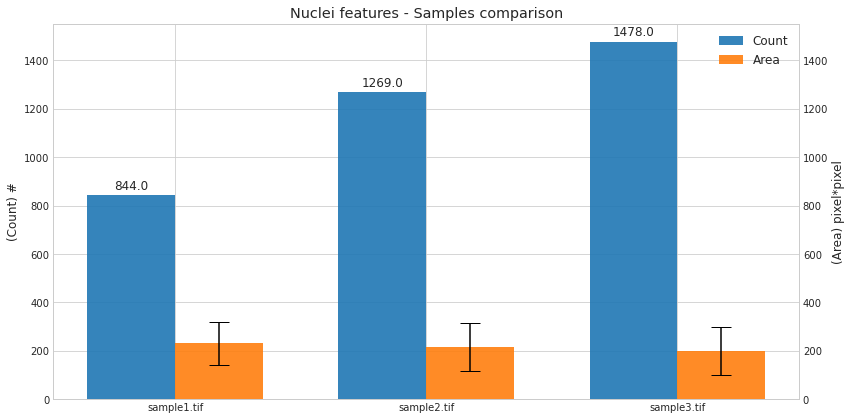

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, count, width, label='Count', alpha=0.9)
rects2 = ax.bar(x + width/2, mean, width, label= f"{selected_feature}", yerr=error_mean, alpha=0.9, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
secax_y = ax.secondary_yaxis('right')
secax_y.set_ylabel('(Area) pixel*pixel')
ax.set_ylabel('(Count) #')
ax.set_title('Nuclei features - Samples comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()
plt.savefig(f"{plotdir}/Sample comparison", bbox_inches = "tight")
plt.show()

From this plot we can see that there is a notable difference in the number of nuclei for the different sample but that the average area (selected feature) is not changing across the samples. With this template is it always possible to creare a second summarizing dataframe, get from it the mean and std series and plot as an additional rectangle.

***
***